# Exercise 2: Movie rating!
Tecnun - UNAV
Winter Course 2019 <p>
drosquete@ceit.es <p>
This exercise is taken from Kaggle. Please <b> DO NOT </b> look for it online; you may see the answer and the idea is to create not to copy :-) 
<img src="zinemaldia.png" style="width: 30%; height: 30%">

## How can we tell the greatness of a movie?

This question puzzled me for a long time since there is no universal way to claim the goodness of movies. Many people rely on critics to gauge the quality of a film, while others use their instincts. But it takes the time to obtain a reasonable amount of critics review after a movie is released. And human instinct sometimes is unreliable.<p>
<p>
There are 2 files, train and test. The idea is to train the model with the train file and then test the results with the test file.<p>
* The train file contains 3782 observations with 28 features and the target.
* The test file contains 1261 observations with 28 features and the target.

## Activity 1: Load libraries and both files

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
testMovies = pd.read_csv('testMovies.csv')
trainMovies = pd.read_csv('trainMovies.csv')
testMovies.head()

,movie_title,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
0,What Dreams May Come,Vincent Ward,121.0,113.0,25.0,129.0,Annabella Sciorra,49000.0,55350897.0,Drama|Fantasy|Romance,...,619.0,English,USA,PG-13,85000000.0,1998.0,448.0,2.35,32000,7.0
1,Mad Max 2: The Road Warrior,George Miller,177.0,87.0,750.0,41.0,Bruce Spence,745.0,9003011.0,Action|Adventure|Sci-Fi|Thriller,...,294.0,English,Australia,R,2000000.0,1981.0,531.0,2.35,0,7.6
2,Over the Hedge,Tim Johnson,166.0,83.0,12.0,925.0,Steve Carell,13000.0,155019340.0,Adventure|Animation|Comedy|Family,...,250.0,English,USA,PG,80000000.0,2006.0,7000.0,1.85,0,6.8
3,Soul Kitchen,Fatih Akin,115.0,99.0,766.0,269.0,Moritz Bleibtreu,595.0,274385.0,Comedy|Drama,...,26.0,German,Germany,NaN,4000000.0,2009.0,486.0,1.85,0,7.3
4,Quartet,Dustin Hoffman,175.0,98.0,0.0,123.0,Sheridan Smith,358.0,18381787.0,Comedy|Drama,...,126.0,English,UK,PG-13,11000000.0,2012.0,156.0,2.35,13000,6.8


## Check your datatypes! Simple Linear Regression (SLR) cannot process strings

You must remove the columns that are not numeric. <b>Tip: </b> check <code>select_dtypes</code> function

In [12]:
testMovies_nostr = testMovies.select_dtypes(exclude = 'object')
trainMovies_nostr = trainMovies.select_dtypes(exclude = 'object')
trainMovies_nostr.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
0,15.0,102.0,11.0,575.0,651.0,2507106.0,2561,3894,0.0,21.0,NaN,2013.0,611.0,NaN,0,6.1
1,279.0,90.0,57.0,92.0,1000.0,258113.0,42678,1528,0.0,135.0,1066167.0,2013.0,235.0,2.35,0,7.1
2,181.0,81.0,670.0,34.0,486.0,7267324.0,161471,623,1.0,709.0,3500000.0,1998.0,37.0,1.85,0,7.8
3,48.0,96.0,3.0,38.0,472.0,27445.0,3788,561,5.0,31.0,9000000.0,2011.0,39.0,1.85,1000,5.3
4,107.0,88.0,6.0,161.0,513.0,NaN,17296,1593,3.0,91.0,NaN,2009.0,480.0,2.35,0,5.2


## Activity 2: Split features from target
By the way... there are some NaN in the data; when doing SLR you cannot have NaN. Could you solve it?

In [15]:
trainMovies_clean = trainMovies_nostr.dropna()
testMovies_clean = testMovies_nostr.dropna()
trainX = pd.DataFrame(trainMovies_clean, columns = trainMovies_clean.columns.drop(['imdb_score']))
trainY = pd.DataFrame(trainMovies_clean, columns = ['imdb_score'])
testX = pd.DataFrame(testMovies_clean, columns = testMovies_clean.columns.drop(['imdb_score']))
testY = pd.DataFrame(testMovies_clean, columns = ['imdb_score'])

## Question: Which is the feature that has the best score on linear model?
To answer this question. Take in consideration the following tips:
* You are allowed to use for loop
* There is a function named "score" on the model, use it as the quality metric
* Check each model coefficient and interception
* Plot the best model and the worst model, according to their features
* Does the best depends on the people?

In [25]:
scores = []
features = trainX.columns

15

In [26]:
for x in range(len(features)):
    singleFeatureModel = linear_model.LinearRegression()
    singleFeatureModel.fit(pd.DataFrame(trainX, columns = [features[x]]), trainY)
    newscore = singleFeatureModel.score(pd.DataFrame(testX, columns = [features[x]]), testY)
    print(x, newscore)
    scores = scores + [newscore]

0 0.1136289692459248
1 0.1685916544691045
2 0.03170576881914411
3 0.00327606742824349
4 -0.0185083663980814
5 0.04861684702076874
6 0.23878505367076353
7 -0.0008060288336591004
8 0.0025227710888603427
9 0.1294300570266772
10 -0.01786404026704358
11 0.02290196514198639
12 0.013546764405935163
13 0.0016228450120281401
14 0.05939967585557726


In [29]:
print(max(scores), min(scores))
# best one is the 6th one and the worst one is the 4th one
bestFeature = features[5]
worstFeature = features[3]
# best model
bestModel = linear_model.LinearRegression()
bestModel.fit(pd.DataFrame(trainX, columns = [bestFeature]), trainY)
best_pre = bestModel.predict (pd.DataFrame(testX, columns = [bestFeature]))
# worst model
worstModel = linear_model.LinearRegression()
worstModel.fit(pd.DataFrame(trainX, columns = [worstFeature]), trainY)
worst_pre = worstModel.predict (pd.DataFrame(testX, columns = [worstFeature]))

0.23878505367076353 -0.0185083663980814


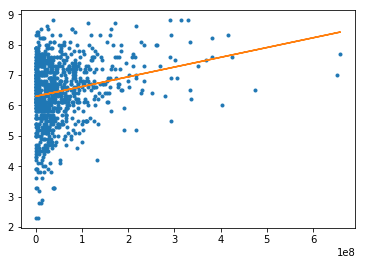

In [30]:
# plot
plt.plot(testX[bestFeature], testY['imdb_score'], '.', testX[bestFeature], best_pre, '-')

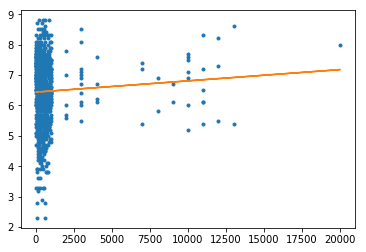

In [31]:
plt.plot(testX[worstFeature], testY['imdb_score'], '.', testX[worstFeature], worst_pre, '-')

### Did your best effort gave you 0.24? Could you try better?

In [37]:
# multiple features model with lasso
alpha = 1e-4
lassoModel = linear_model.Lasso(alpha = alpha, normalize = True)
lassoModel.fit(trainX, trainY)
lassoModel.score(testX, testY)

0.3645461735640476

In [44]:
# multiple features model with ridge
l2_small_penalty = 1e-5
ridgeModel = linear_model.Ridge(alpha=l2_small_penalty, normalize = True)
ridgeModel.fit(trainX, trainY)
ridgeModel.score(testX, testY)

0.36597491201439813